# 1. Preparation

## 1.1. Library Upload

In [33]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# Uploading Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn
import xgboost as xgb
import tensorflow as tf
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from folium.plugins import HeatMap

## 1.2. Data Upload

In [35]:
# Uploading the dataset
data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')
data

C:\Users\ahska\AppData\Local\Temp\ipykernel_46204\3319388646.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,PAST SALE,April-21-2020,Single Family Residential,7135 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",950000,4,...,1.200146,2.399690,1.506827,3.583604,2.246205,0.496974,4.826767,0.641446,2.702233,6.853520
16660,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16661,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16662,PAST SALE,November-9-2022,Single Family Residential,8150 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",1150000,4,...,0.875637,4.332201,2.193801,4.861157,0.999305,0.446238,3.915165,0.612154,2.545826,9.123077


# 2. Data Preprocessing

## 2.1. Data Check

In [36]:
# Displaying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [37]:
# Checking for null values/missing values
data.isnull().sum()

SALE TYPE                                  0
SOLD DATE                               2917
PROPERTY TYPE                              0
ADDRESS                                    0
CITY                                       0
STATE OR PROVINCE                          0
ZIP OR POSTAL CODE                         0
NEIGHBORHOOD                               0
PRICE                                      0
BEDS                                       0
BATHS                                      0
LOCATION                                   0
SQUARE FEET                                0
LOT SIZE                                2610
YEAR BUILT                                 0
DAYS ON MARKET                         14155
$/SQUARE FEET                              0
HOA/MONTH                              12109
STATUS                                  1017
NEXT OPEN HOUSE START TIME             16254
NEXT OPEN HOUSE END TIME               16254
URL                                        0
SOURCE    

In [38]:
columns_to_drop = ['SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 
                   'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 
                   'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 
                   'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long']

# Drop columns that exist in the DataFrame
data_check = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [39]:
# Checking the statistics of the data
data_check.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,gas_station_accessibility,parking_accessibility,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
count,1.666400e+04,16664.00000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,...,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000,16664.000000
mean,1.204680e+06,3.06325,2.285241,1943.243639,1972.158125,1.193679,13.715487,0.062136,21.232271,0.005389,...,5.151770,9.039253,5.808909,26.027815,3.625721,1.742096,5.111753,0.477210,4.854828,23.638285
std,1.463403e+06,1.28549,1.047168,1075.379249,39.464822,0.914335,37.208423,0.225246,11.841349,0.050845,...,9.341222,13.564628,5.094240,39.461253,5.388173,5.627861,3.778865,0.589981,5.017696,20.534118
min,6.170600e+04,1.00000,1.000000,142.000000,1889.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.270000e+05,2.00000,2.000000,1220.000000,1940.000000,0.394569,1.187634,0.000000,14.381177,0.000000,...,0.735626,2.620514,1.967434,6.526101,0.768549,0.000000,2.216129,0.078605,1.943787,9.092470
50%,8.850000e+05,3.00000,2.000000,1720.000000,1973.000000,1.087226,3.061848,0.000000,20.179976,0.000000,...,2.180284,5.126611,4.575636,14.473039,1.964593,0.255883,4.539812,0.359653,3.407789,19.107166
75%,1.295500e+06,4.00000,3.000000,2410.000000,2011.000000,1.873552,7.709890,0.000000,24.519093,0.000000,...,5.127719,8.961904,8.200062,27.064461,4.302296,0.953896,6.947047,0.653980,5.559859,32.117487
max,6.710000e+07,22.00000,23.000000,20587.000000,2025.000000,3.940469,259.771887,3.326475,87.113944,0.885319,...,66.753270,101.198643,28.019075,277.198990,41.163393,62.243117,20.745593,4.827632,34.491707,126.337807


## 2.2. Feature Engineering

### 2.2.1. "Year Built" Feature Transformation

In [40]:
# Creating 'age' as a new variable by extracting it from the 'yr_built' variable
data.rename(columns={'YEAR BUILT':'AGE'},inplace=True)
data['AGE'] = 2024 - data['AGE']

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [43]:
# Ensuring conversion of categorical variable is successful
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


## 2.3. Data Variations & Splitting

### 2.3.1. Filtering Past Sale

In [44]:
# We will only use property that are sold in the past 2 years

# Filter the data for past sales
data_1 = data[data['SALE TYPE'] == 'PAST SALE']

# Display the first few rows of the filtered dataframe
data_1

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
5,PAST SALE,January-3-2023,Single Family Residential,3235 95th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8500000,5,...,0.000000,0.829253,0.170630,0.687282,0.186249,0.000000,0.364407,0.697736,0.468052,1.383353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,PAST SALE,April-21-2020,Single Family Residential,7135 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",950000,4,...,1.200146,2.399690,1.506827,3.583604,2.246205,0.496974,4.826767,0.641446,2.702233,6.853520
16660,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16661,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16662,PAST SALE,November-9-2022,Single Family Residential,8150 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",1150000,4,...,0.875637,4.332201,2.193801,4.861157,0.999305,0.446238,3.915165,0.612154,2.545826,9.123077


### 2.3.2. Version 1 - Scaling for All Features

In [45]:
# Selecting numerical columns (excluding target variable 'price')
features_1 = data_1.drop(columns=['SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'])
numerical_features_1 = features_1.select_dtypes(include=['number']).columns

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_1[numerical_features_1] = scaler.fit_transform(data_1[numerical_features_1])

C:\Users\ahska\AppData\Local\Temp\ipykernel_46204\3529950367.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[numerical_features_1] = scaler.fit_transform(data_1[numerical_features_1])


In [46]:
data_1.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,1.137821,-0.871684,...,-0.377385,-0.433953,-0.641368,-0.376382,-0.641395,-0.254422,-0.925099,0.906610,-0.524824,-0.650321
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),0.614244,0.803304,...,-0.543573,-0.586189,-1.124805,-0.645838,-0.671666,-0.302575,-1.365144,0.309317,-0.793592,-1.092761
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),3.224673,0.803304,...,-0.530561,-0.588496,-1.024768,-0.629341,-0.241601,-0.177428,-0.782427,-0.471427,-0.695922,-0.926673
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),6.955348,1.640798,...,-0.543272,-0.627875,-1.067725,-0.640525,-0.354979,-0.201877,-0.697212,0.558628,-0.788185,-1.018258
5,PAST SALE,January-3-2023,Single Family Residential,3235 95th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),5.463675,1.640798,...,-0.543573,-0.592935,-1.091454,-0.628921,-0.636985,-0.302575,-1.266969,0.395058,-0.858142,-1.062984


#### Data Splitting

In [47]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    data_1.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_1['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.2. Version 2 - Scaling for All Feature & Adding Dummy Variable

In [62]:
# Creating a new version of the dataset
data_2 = data_1.copy()

In [63]:
data_2.head(5)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,1.137821,-0.871684,...,-0.377385,-0.433953,-0.641368,-0.376382,-0.641395,-0.254422,-0.925099,0.906610,-0.524824,-0.650321
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),0.614244,0.803304,...,-0.543573,-0.586189,-1.124805,-0.645838,-0.671666,-0.302575,-1.365144,0.309317,-0.793592,-1.092761
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),3.224673,0.803304,...,-0.530561,-0.588496,-1.024768,-0.629341,-0.241601,-0.177428,-0.782427,-0.471427,-0.695922,-0.926673
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),6.955348,1.640798,...,-0.543272,-0.627875,-1.067725,-0.640525,-0.354979,-0.201877,-0.697212,0.558628,-0.788185,-1.018258
5,PAST SALE,January-3-2023,Single Family Residential,3235 95th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),5.463675,1.640798,...,-0.543573,-0.592935,-1.091454,-0.628921,-0.636985,-0.302575,-1.266969,0.395058,-0.858142,-1.062984


##### Dummy Variable

In [64]:
import pandas as pd

# Assuming 'data_1' is your original DataFrame and 'PROPERTY TYPE' is the categorical column
# Create dummy variables
dummies_2 = pd.get_dummies(data_2['PROPERTY TYPE'], prefix='PROPERTY_TYPE')


# If for some reason the dummies are not in the format you want, you can convert them to int
dummies_2 = dummies_2.astype(int)



# Concatenate the dummy variables with the original DataFrame
data_2 = pd.concat([data_2, dummies_2], axis=1)

# Now 'data_1' has both the original 'PROPERTY TYPE' column and the new dummy variables


##### Data Splitting

In [65]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    data_2.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_2['PRICE'],
    test_size=0.3,
    random_state=10
)

# 3. Running the Model

## 3.1. Version 1

### 3.1.3. RandomForest Model (RF)

#### 3.1.3.1. Baseline Model

In [52]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_1 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_1 = rf_model_1.fit(X_train_1, y_train_1)

# Predict on the test set
test_rf_pred_1 = rf_model_1.predict(X_test_1)


In [53]:
# Calculate evaluation metrics
test_mse_rf_1 = mean_squared_error(y_test_1, test_rf_pred_1)
test_rmse_rf_1 = np.sqrt(test_mse_rf_1)
test_mae_rf_1 = mean_absolute_error(y_test_1, test_rf_pred_1)
test_r2_rf_1 = r2_score(y_test_1, test_rf_pred_1)

print(f"Mean Squared Error: {test_mse_rf_1}")
print(f"Root Mean Squared Error: {test_rmse_rf_1}")
print(f"Root Mean Squared Error: {test_mae_rf_1}")
print(f"R² Score: {test_r2_rf_1}")

Mean Squared Error: 0.9590681111280973
Root Mean Squared Error: 0.9793202291018487
Root Mean Squared Error: 0.13739829752929986
R² Score: 0.47669367673994034


#### 3.1.3.2. Cross-Validation Model

In [54]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, r2_score, mean_squared_error
# import numpy as np

# # Custom scorer for RMSE
# def rmse_score_rfcv_1(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# rmse_scorer_rfcv_1 = make_scorer(rmse_score_rfcv_1, greater_is_better=False)

# # Cross-validate the model using RMSE
# train_rmse_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring=rmse_scorer_rfcv_1)

# # Cross-validate the model using Mean Absolute Error
# train_mae_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='neg_mean_absolute_error')

# # Cross-validate the model using R^2
# train_r2_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='r2')


In [55]:
# # Print cross-validation results
# print("CV RMSE scores:", -train_rmse_rf_cv_1)  # Negate RMSE scores because make_scorer(mse, greater_is_better=False) makes them negative
# print("CV RMSE average score:", -np.mean(train_rmse_rf_cv_1))

# print("CV R^2 scores:", -train_mae_rf_cv_1)
# print("CV R^2 average score:", np.mean(train_mae_rf_cv_1))

# print("CV R^2 scores:", train_r2_rf_cv_1)
# print("CV R^2 average score:", np.mean(train_r2_rf_cv_1))

#### 3.1.3.3. Hyperparameter Tuning

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_1 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_1 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_1 = GridSearchCV(estimator=rfgs_model_1, param_grid=param_grid_rfgs_1, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_1.fit(X_train_1, y_train_1)

# Get the best estimator
best_rfgs_model_1 = grid_search_rf_1.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_1 = best_rfgs_model_1.predict(X_test_1)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
521 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [57]:
# Calculate evaluation metrics
test_mse_rfgs_1 = mean_squared_error(y_test_1, test_rfgs_pred_1)
test_rmse_rfgs_1 = np.sqrt(test_mse_rfgs_1)
test_mae_rfgs_1 = mean_absolute_error(y_test_1, test_rfgs_pred_1)
test_r2_rfgs_1 = r2_score(y_test_1, test_rfgs_pred_1)

# Print the results
print("Best model parameters:", grid_search_rf_1.best_params_)
print(f"Test MSE: {test_mse_rfgs_1}")
print(f"Test RMSE: {test_rmse_rfgs_1}")
print(f"Test MAE: {test_mae_rfgs_1}")
print(f"Test R² Score: {test_r2_rfgs_1}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test MSE: 1.08762404752845
Test RMSE: 1.0428921552722745
Test MAE: 0.12123033225484187
Test R² Score: 0.4065483621055168


#### 3.1.3.4. RandomForest Model Comparison

In [58]:
# Displaying the comparison through a table

rf_comparison_1 = {
    'Model': ['Random Forest Baseline Model', 'Random Forest with GridSearch'],
    'Model Object': [rf_model_1, best_rfgs_model_1],
    'RMSE': [test_rmse_rf_1, test_rmse_rfgs_1],
    'MAE': [test_mae_rf_1, test_mae_rfgs_1],
    'R-Squared Score': [test_r2_rf_1, test_r2_rfgs_1]
}

rf_comparison_1 = pd.DataFrame(rf_comparison_1)

rf_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",0.979320,0.137398,0.476694
1,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",1.042892,0.121230,0.406548


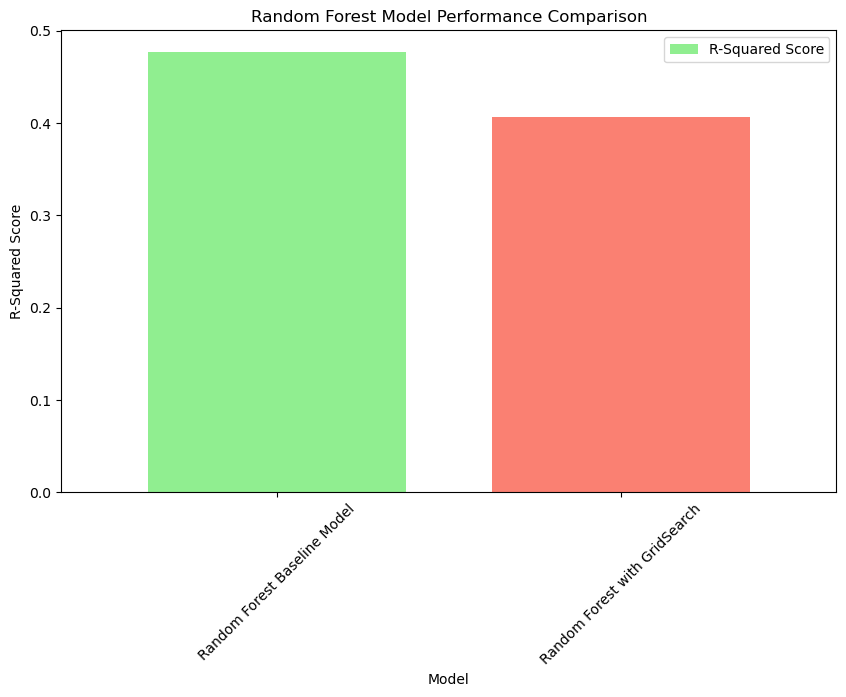

In [59]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_1 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_1, ax_rf_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_1 = rf_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_1,  # Apply different colors
    ax=ax_rf_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_1.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_1.set_xticklabels(ax_rf_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_1, labels_rf_1 = ax_rf_1.get_legend_handles_labels()
ax_rf_1.legend(lines_rf_1, labels_rf_1)

# Show the plot
plt.show()

#### 3.1.3.5. Choosing the Best Model

In [60]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_1 = rf_comparison_1.iloc[0]['Model']
best_rf_model_1 = rf_comparison_1.iloc[0]['Model Object']
best_rf_r2_score_1 = rf_comparison_1.iloc[0]['R-Squared Score']
best_rf_rmse_1 = rf_comparison_1.iloc[0]['RMSE']
best_rf_mae_1 = rf_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_1 = best_rf_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_1)
print("The highest R-Squared Score is:", best_rf_r2_score_1)
print("The best RMSE is:", best_rf_rmse_1)
print("The best MAE is:", best_rf_mae_1)

The best model based on R-Squared Score is: Random Forest Baseline Model
The highest R-Squared Score is: 0.47669367673994034
The best RMSE is: 0.9793202291018487
The best MAE is: 0.13739829752929986


## 3.2. Version 2

### 3.2.1. Random Forest (RF) Model

#### 3.2.1.1. Baseline Model

In [66]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_2 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_2 = rf_model_2.fit(X_train_2, y_train_2)

# Predict on the test set
test_rf_pred_2 = rf_model_2.predict(X_test_2)


In [67]:
# Calculate evaluation metrics
test_mse_rf_2 = mean_squared_error(y_test_2, test_rf_pred_2)
test_rmse_rf_2 = np.sqrt(test_mse_rf_2)
test_mae_rf_2 = mean_absolute_error(y_test_1, test_rf_pred_2)
test_r2_rf_2 = r2_score(y_test_2, test_rf_pred_2)

print(f"Mean Squared Error: {test_mse_rf_2}")
print(f"Root Mean Squared Error: {test_rmse_rf_2}")
print(f"Root Mean Squared Error: {test_mae_rf_2}")
print(f"R² Score: {test_r2_rf_2}")

Mean Squared Error: 0.9527462941740809
Root Mean Squared Error: 0.9760872369691558
Root Mean Squared Error: 0.1354283527303827
R² Score: 0.48014311557347444


#### 3.2.1.2. Hyperparameter Tuning (with GridSearch)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_2 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_2 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_2 = GridSearchCV(estimator=rfgs_model_2, param_grid=param_grid_rfgs_2, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_2.fit(X_train_2, y_train_2)

# Get the best estimator
best_rfgs_model_2 = grid_search_rf_2.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_2 = best_rfgs_model_2.predict(X_test_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
511 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [69]:
# Calculate evaluation metrics
test_mse_rfgs_2 = mean_squared_error(y_test_2, test_rfgs_pred_2)
test_rmse_rfgs_2 = np.sqrt(test_mse_rfgs_2)
test_mae_rfgs_2 = mean_absolute_error(y_test_2, test_rfgs_pred_2)
test_r2_rfgs_2 = r2_score(y_test_2, test_rfgs_pred_2)

# Print the results
print("Best model parameters:", grid_search_rf_2.best_params_)
print(f"Test MSE: {test_mse_rfgs_2}")
print(f"Test RMSE: {test_rmse_rfgs_2}")
print(f"Test MAE: {test_mae_rfgs_2}")
print(f"Test R² Score: {test_r2_rfgs_2}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test MSE: 1.0913769466330057
Test RMSE: 1.0446898806023754
Test MAE: 0.11936256499349304
Test R² Score: 0.40450062867638537


## 3.X. Feature Importance

In [ ]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_reg_model_name_1 = rf_comparison_1.iloc[0]['Model']
best_reg_model_1 = rf_comparison_1.iloc[0]['Model Object']
best_reg_r2_score_1 = rf_comparison_1.iloc[0]['R-Squared Score']
best_reg_rmse_1 = rf_comparison_1.iloc[0]['RMSE']
best_reg_mae_1 = rf_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_reg_1 = best_reg_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_reg_1)
print("The highest R-Squared Score is:", best_reg_r2_score_1)
print("The best RMSE is:", best_reg_rmse_1)
print("The best MAE is:", best_reg_mae_1)

In [ ]:
# We choose the model with the highest R-Squared

# Feature importance
best_reg_feature_importances_1 = best_reg_model_1.feature_importances_
best_reg_features_1 = pd.DataFrame({'Feature': X_train_1.columns, 'Importance': best_reg_feature_importances_1})
best_reg_features_1.sort_values(by='Importance', ascending=False, inplace=True)
print(best_reg_features_1)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=best_reg_features_1, palette='viridis')
plt.title('Feature Importances in Best Regression Model')
plt.show()

In [ ]:
# Display only the top N features for clarity
top_n = 10
plt.figure(figsize=(10, 8))
plt.barh(best_reg_features_1['Feature'][:top_n], best_reg_features_1['Importance'][:top_n], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances in Best Regression Model')
plt.show()


# 4. All Version Comparison

## 4.1. All Models

In [ ]:
all_model_1 = pd.concat([linreg_comparison_1,
                       xgb_comparison_1,
                       rf_comparison_1,
                       nn_comparison_1,
                       nn_filter_comparison_1], ignore_index=True)

all_model_1 = all_model_1.sort_values('R-Squared Score', ascending=False)

all_model_1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_model, ax_model = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=all_model_1, ax=ax_model)
ax_model.set_title('Comparison of R-Squared Score Across Models')
ax_model.set_ylabel('R-Squared Score')
ax_model.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_model.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_model.set_xticklabels(ax_model.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


## 4.2. Model Type Comparison

In [ ]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_linreg = linreg_comparison_1['RMSE'].mean()
average_mae_linreg = linreg_comparison_1['MAE'].mean()
average_r_squared_linreg = linreg_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_linreg:.4f}")
print(f"Average MAE: {average_mae_linreg:.4f}")
print(f"Average R-Squared Score: {average_r_squared_linreg:.4f}")

In [ ]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_xgb = xgb_comparison_1['RMSE'].mean()
average_mae_xgb = xgb_comparison_1['MAE'].mean()
average_r_squared_xgb = xgb_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_xgb:.4f}")
print(f"Average MAE: {average_mae_xgb:.4f}")
print(f"Average R-Squared Score: {average_r_squared_xgb:.4f}")

In [ ]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_rf = rf_comparison_1['RMSE'].mean()
average_mae_rf = rf_comparison_1['MAE'].mean()
average_r_squared_rf = rf_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_rf:.4f}")
print(f"Average MAE: {average_mae_rf:.4f}")
print(f"Average R-Squared Score: {average_r_squared_rf:.4f}")

In [ ]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_nn = nn_comparison_1['RMSE'].mean()
average_mae_nn = nn_comparison_1['MAE'].mean()
average_r_squared_nn = nn_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_nn:.4f}")
print(f"Average MAE: {average_mae_nn:.4f}")
print(f"Average R-Squared Score: {average_r_squared_nn:.4f}")

In [ ]:
# Calculating the average for RMSE, MAE, and R-Squared Score
average_rmse_nn_filter = nn_filter_comparison_1['RMSE'].mean()
average_mae_nn_filter = nn_filter_comparison_1['MAE'].mean()
average_r_squared_nn_filter = nn_filter_comparison_1['R-Squared Score'].mean()

print(f"Average RMSE: {average_rmse_nn_filter:.4f}")
print(f"Average MAE: {average_mae_nn_filter:.4f}")
print(f"Average R-Squared Score: {average_r_squared_nn_filter:.4f}")

In [ ]:
# Displaying the comparison through a table

average_by_model = {
    'Model': ['Linear & Ridge Models', 'XGBoost Models', 'RandomForest Models', 'Neural Network (NN) Models', 'Filtered Feature NN Model'],
    'RMSE': [average_rmse_linreg, average_rmse_xgb, average_rmse_rf, average_rmse_nn, average_rmse_nn_filter],
    'MAE': [average_mae_linreg, average_mae_xgb, average_mae_rf, average_mae_nn, average_mae_nn_filter],
    'R-Squared Score': [average_r_squared_linreg, average_r_squared_xgb, average_r_squared_rf, average_r_squared_nn, average_r_squared_nn_filter]
}

average_by_model = pd.DataFrame(average_by_model)

average_by_model.sort_values(['R-Squared Score'], ascending=[False])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_model_type, ax_model_type = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=average_by_model, ax=ax_model_type)
ax_model_type.set_title('Comparison of R-Squared Score Across Model Type')
ax_model_type.set_ylabel('R-Squared Score')
ax_model_type.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_model_type.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_model_type.set_xticklabels(ax_model_type.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


# 5. Creating an Estimator

In [ ]:
# # Define the function with appropriate debug statements
# def predict_house_price_with_interval(model, scaler, feature_values, target_scaler, percentile=95):
#     try:
#         # Convert feature values into DataFrame
#         input_features = pd.DataFrame(feature_values)
        
#         # Check if all expected columns are present
#         if not set(input_features.columns).issubset(set(scaler.feature_names_in_)):
#             missing_cols = set(scaler.feature_names_in_) - set(input_features.columns)
#             raise ValueError(f"Missing columns: {missing_cols}")
        
#         # Scale the features
#         input_features_scaled = scaler.transform(input_features)
        
#         # Use the Random Forest's built-in method to get predictions from each tree
#         preds_scaled = np.array([tree.predict(input_features_scaled.reshape(1, -1)) for tree in model.estimators_])
        
#         # Reverse scaling for the target variable
#         preds = target_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
        
#         # Calculate the mean prediction
#         mean_prediction = np.mean(preds)
        
#         # Calculate the percentiles to form the prediction interval
#         lower_bound = np.percentile(preds, (100 - percentile) / 2.)
#         upper_bound = np.percentile(preds, 100 - (100 - percentile) / 2.)
        
#         return mean_prediction, lower_bound, upper_bound
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         return None, None, None


In [ ]:
# # Feature names ordered as expected by the model (ensure this order matches your training data)
# feature_names = [
#     'BEDS', 'BATHS', 'SQUARE FEET', 'AGE', 'gas_station_accessibility', 
#     'parking_accessibility', 'airport_accessibility', 'bus_station_accessibility', 
#     'ferry_terminal_accessibility', 'light_rail_station_accessibility', 
#     'train_station_accessibility', 'transit_station_accessibility', 
#     'transportation_others_accessibility', 'library_accessibility', 
#     'preschool_accessibility', 'school_accessibility', 'university_accessibility', 
#     'amusement_center_accessibility', 'community_center_accessibility', 
#     'entertainment_accessibility', 'park_accessibility', 'bar_accessibility', 
#     'cafe_and_bakery_accessibility', 'food_others_accessibility', 
#     'restaurant_accessibility', 'health_store_accessibility', 
#     'hospital_accessibility', 'places_of_worship_accessibility', 
#     'safety_accessibility', 'stores_essentials_accessibility', 
#     'stores_others_accessibility'
# ]

In [ ]:
# import pandas as pd

# # Example input features for prediction
# feature_values = {
#     'BEDS': [3],
#     'BATHS': [2.0],
#     'SQUARE FEET': [1720],
#     'AGE': [51],
#     'gas_station_accessibility': [1.1],
#     'parking_accessibility': [3.1],
#     'airport_accessibility': [0.0],
#     'bus_station_accessibility': [20.2],
#     'ferry_terminal_accessibility': [0.0],
#     'light_rail_station_accessibility': [5.0],
#     'train_station_accessibility': [5.0],
#     'transit_station_accessibility': [20.0],
#     'transportation_others_accessibility': [5.0],
#     'library_accessibility': [10.0],
#     'preschool_accessibility': [10.0],
#     'school_accessibility': [24.5],
#     'university_accessibility': [1.0],
#     'amusement_center_accessibility': [1.0],
#     'community_center_accessibility': [5.0],
#     'entertainment_accessibility': [25.0],
#     'park_accessibility': [10.0],
#     'bar_accessibility': [5.0],
#     'cafe_and_bakery_accessibility': [5.0],
#     'food_others_accessibility': [5.0],
#     'restaurant_accessibility': [14.5],
#     'health_store_accessibility': [2.0],
#     'hospital_accessibility': [1.0],
#     'places_of_worship_accessibility': [5.0],
#     'safety_accessibility': [0.5],
#     'stores_essentials_accessibility': [3.5],
#     'stores_others_accessibility': [19.0]
# }




In [ ]:
# # Now X_train_1 should not have 'PRICE' and you can fit the scaler
# feature_scaler_1 = StandardScaler()
# feature_scaler_1.fit(X_train_1)  # Fit scaler to the training features

# # Scale the features
# X_train_1_scaled = feature_scaler_1.transform(X_train_1)
# X_test_1_scaled = feature_scaler_1.transform(X_test_1)

# # If you're scaling the target, ensure y_train is reshaped for compatibility with StandardScaler
# target_scaler_1 = StandardScaler()
# y_train_1_scaled = target_scaler_1.fit_transform(y_train_1.values.reshape(-1, 1))

# # Assuming 'target_scaler' is an instance of StandardScaler for the target variable
# # Example of using the function
# # Now let's attempt to make a prediction
# predicted_price, lower_price, upper_price = predict_house_price_with_interval(
#     rf_model_1, feature_scaler_1, feature_values, target_scaler_1)

# if predicted_price is not None:
#     print(f"Estimated House Price Range: ${lower_price:,.2f} - ${upper_price:,.2f} (Mean: ${predicted_price:,.2f})")
# else:
#     print("Failed to make prediction.")
